# 直播数据分析
数据已脱敏

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import seaborn as sns

# 某时间段直播间数据
data_string = io.StringIO(
'''\
直播开始时间,直播结束时间,直播间曝光人数,直播间曝光次数,直播间观看人数,直播间观看次数,评论次数,新加直播团人数,新增粉丝数,取关粉丝数,直播间商品曝光人数,直播间商品点击人数,直播间商品曝光次数,直播间商品点击次数,直播间成交订单数,直播间成交金额,直播间成交件数,直播间成交人数,直播间退款订单数,直播间退款金额,直播间退款人数
2023/08/04 06:56:35,2023/08/04 23:15:46,630822,1260127,56838,85936,11114,167,1217,329,51447,10537,674965,28319,1606,307032.49,1614,1451,337,59152.55,305
2023/08/02 06:57:36,2023/08/02 23:51:59,635096,1184680,52783,76198,10370,119,984,327,47816,9729,703151,23908,1556,284419.33,1562,1414,328,56475.29,297
2023/08/05 06:59:17,2023/08/05 23:05:55,542010,1097373,52902,79600,10871,127,1012,300,48015,11216,738659,28161,1474,260247.89,1491,1347,316,48869.37,293
2023/08/07 06:59:00,2023/08/07 23:02:29,490608,1007670,43413,65969,8433,32,547,305,39544,9364,554218,22698,1266,201246.57,1282,1185,250,37003.85,236
2023/08/13 06:57:03,2023/08/13 23:00:44,663789,1275948,46731,70794,8722,23,614,304,41115,9081,521491,22276,1171,186832.74,1182,1119,180,25731.05,172
2023/08/06 07:01:46,2023/08/06 23:01:15,398839,861627,43022,66389,9870,28,495,319,39210,8665,569350,21565,1148,184765.27,1166,1085,192,26784.18,180
2023/08/08 06:59:51,2023/08/08 23:03:01,552544,1113452,42465,62840,9078,30,503,266,38145,8275,580055,19765,1066,173176.88,1087,1005,205,32093.56,188
2023/08/14 06:59:17,2023/08/14 23:04:28,448171,967067,40964,64210,9859,30,500,271,36535,8058,570994,20213,1090,171856.12,1111,1037,196,25917.6,184
2023/08/16 06:58:48,2023/08/16 23:06:58,356248,792596,39601,60416,9916,20,496,276,35968,7474,566945,18720,1064,167563.51,1080,1008,188,27083.09,178
2023/08/03 17:48:37,2023/08/04 00:26:12,354539,613709,33973,45862,4949,74,535,182,30429,6062,360484,15680,806,153407.8,807,729,170,28093.63,155
2023/08/26 06:56:11,2023/08/26 23:01:17,302208,690941,36814,55564,6795,11,329,281,34056,6425,514731,16103,918,147701.51,924,870,102,17216.01,96
2023/08/27 06:59:28,2023/08/27 23:01:32,306084,684437,36131,53812,6337,21,364,294,34207,6876,495600,17817,1012,146307.01,1017,955,105,15904.72,99
2023/07/31 07:00:31,2023/07/31 23:01:51,370335,807698,38139,58958,9656,38,419,281,34874,6237,533808,15321,1015,140342.27,1024,965,150,18818.65,138
2023/08/15 08:44:02,2023/08/15 23:06:09,310464,681966,32537,51009,8976,24,384,254,30295,6313,515906,15607,869,139131.83,884,825,149,22420.13,142
2023/08/22 06:59:35,2023/08/22 22:02:36,318848,700788,36257,52071,4851,7,27133,227,34347,5450,340433,13466,858,138927.27,866,813,130,19012.93,124
2023/08/17 06:59:51,2023/08/17 23:11:55,335279,727100,35192,54750,9231,25,456,284,32580,6518,465931,16898,859,136678.03,869,817,157,21884.06,149
2023/07/30 07:01:47,2023/07/30 23:00:52,318507,720980,35284,55936,9839,28,356,262,29389,5195,435024,13542,825,124102.58,832,769,141,18802.55,130
2023/08/01 06:58:18,2023/08/01 23:01:45,349603,742095,36053,55354,9572,26,319,286,33001,5272,435116,12842,824,118816.08,829,786,133,18651.86,125
2023/08/25 07:00:04,2023/08/25 23:01:15,263730,596627,29828,45082,6050,25,317,259,28636,5283,376722,13748,737,108454.1,741,702,80,10899.52,77
2023/08/20 07:26:55,2023/08/20 18:15:17,303020,596336,33654,47940,8002,20,530,210,31889,9566,429288,18730,669,103752.57,685,622,104,14610.98,97
2023/08/21 06:59:10,2023/08/21 15:35:33,284238,532271,34657,44671,4322,14,252,136,33023,4200,268222,10218,580,100383.19,587,555,70,11304.14,68
2023/08/12 06:58:59,2023/08/12 23:01:25,262047,582178,30106,47285,8516,27,349,311,27956,5165,409379,13257,600,100198.84,604,566,101,14795.9,93
2023/08/24 11:25:25,2023/08/24 23:06:51,246055,503695,28355,40912,5293,24,304,248,26318,5241,383316,12705,602,99441.99,605,570,117,18080.32,110
2023/08/09 07:00:48,2023/08/09 23:00:56,277496,635953,29833,46719,8725,34,308,283,27638,4635,407683,12034,558,95493.01,568,529,94,15241.22,89
2023/08/11 06:58:27,2023/08/11 23:01:19,288438,635442,29810,46611,8971,24,371,239,27020,4944,428310,12890,570,93832.37,572,544,95,12937.31,87
2023/08/10 06:58:47,2023/08/10 23:02:10,260061,604407,29747,46192,8330,25,309,260,27223,4811,357907,12825,540,90342.72,542,510,98,15597.11,90
2023/08/18 06:59:11,2023/08/18 23:00:16,268641,614084,28841,46213,9905,17,326,267,27889,5453,487905,14170,547,89356.07,552,515,96,12744.9,93
2023/08/03 06:56:26,2023/08/03 11:15:12,215011,362724,17153,23130,2977,50,329,80,15392,2653,163098,6719,467,89213.5,467,432,61,11308.8,55
2023/08/03 13:11:44,2023/08/03 17:40:53,196589,323848,18518,23962,4444,40,312,96,16795,3238,193081,8395,437,82650.7,438,382,95,16985.51,86
2023/08/21 15:41:53,2023/08/21 23:00:29,227870,436977,33188,43210,4725,10,183,151,31745,3890,304790,9603,508,79315.28,514,475,63,9508.6,57
2023/08/20 18:31:38,2023/08/20 23:01:58,147634,264925,16475,21507,2395,5,146,132,15459,3407,139773,7966,417,65363.75,422,402,64,8717.93,62
2023/08/19 06:59:37,2023/08/19 15:02:12,189854,379277,18560,27898,5397,19,193,146,17494,3067,232722,8178,340,55947.28,347,316,65,9843.2,59
2023/08/28 06:59:22,1970/01/01 08:00:00,144502,261852,13081,18225,2855,3,162,0,12231,2871,160642,7446,342,52448.19,347,328,32,5116.9,31
2023/08/19 18:59:32,2023/08/19 23:00:23,90573,170619,10858,14529,2098,5,91,121,10202,1363,98953,3523,148,22332.84,148,140,15,2283.6,14
2023/08/15 06:55:52,2023/08/15 08:16:34,51465,76496,3885,4854,698,3,37,23,3612,634,35057,1705,90,11937,90,87,13,1801.9,12
'''
)

#读取数据
df = pd.read_csv(data_string)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   直播开始时间     35 non-null     object 
 1   直播结束时间     35 non-null     object 
 2   直播间曝光人数    35 non-null     int64  
 3   直播间曝光次数    35 non-null     int64  
 4   直播间观看人数    35 non-null     int64  
 5   直播间观看次数    35 non-null     int64  
 6   评论次数       35 non-null     int64  
 7   新加直播团人数    35 non-null     int64  
 8   新增粉丝数      35 non-null     int64  
 9   取关粉丝数      35 non-null     int64  
 10  直播间商品曝光人数  35 non-null     int64  
 11  直播间商品点击人数  35 non-null     int64  
 12  直播间商品曝光次数  35 non-null     int64  
 13  直播间商品点击次数  35 non-null     int64  
 14  直播间成交订单数   35 non-null     int64  
 15  直播间成交金额    35 non-null     float64
 16  直播间成交件数    35 non-null     int64  
 17  直播间成交人数    35 non-null     int64  
 18  直播间退款订单数   35 non-null     int64  
 19  直播间退款金额    35 non-null     float64
 20  直播间退款人数    3

预览部分数据

In [2]:
df.head()

,直播开始时间,直播结束时间,直播间曝光人数,直播间曝光次数,直播间观看人数,直播间观看次数,评论次数,新加直播团人数,新增粉丝数,取关粉丝数,...,直播间商品点击人数,直播间商品曝光次数,直播间商品点击次数,直播间成交订单数,直播间成交金额,直播间成交件数,直播间成交人数,直播间退款订单数,直播间退款金额,直播间退款人数
0,2023/08/04 06:56:35,2023/08/04 23:15:46,630822,1260127,56838,85936,11114,167,1217,329,...,10537,674965,28319,1606,307032.49,1614,1451,337,59152.55,305
1,2023/08/02 06:57:36,2023/08/02 23:51:59,635096,1184680,52783,76198,10370,119,984,327,...,9729,703151,23908,1556,284419.33,1562,1414,328,56475.29,297
2,2023/08/05 06:59:17,2023/08/05 23:05:55,542010,1097373,52902,79600,10871,127,1012,300,...,11216,738659,28161,1474,260247.89,1491,1347,316,48869.37,293
3,2023/08/07 06:59:00,2023/08/07 23:02:29,490608,1007670,43413,65969,8433,32,547,305,...,9364,554218,22698,1266,201246.57,1282,1185,250,37003.85,236
4,2023/08/13 06:57:03,2023/08/13 23:00:44,663789,1275948,46731,70794,8722,23,614,304,...,9081,521491,22276,1171,186832.74,1182,1119,180,25731.05,172


描述数据的基本概况

In [3]:
df.describe()

,直播间曝光人数,直播间曝光次数,直播间观看人数,直播间观看次数,评论次数,新加直播团人数,新增粉丝数,取关粉丝数,直播间商品曝光人数,直播间商品点击人数,直播间商品曝光次数,直播间商品点击次数,直播间成交订单数,直播间成交金额,直播间成交件数,直播间成交人数,直播间退款订单数,直播间退款金额,直播间退款人数
count,35.000000,3.500000e+01,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,325749.085714,6.716561e+05,32732.80000,48703.085714,7204.057143,33.571429,1176.628571,228.857143,30042.714286,5919.085714,412963.114286,14771.800000,787.971429,129229.102286,795.885714,738.714286,134.057143,20334.083429,124.885714
std,146962.366895,2.974774e+05,11878.73101,18559.323209,2869.366962,35.671117,4523.145809,87.539955,10655.976872,2572.180231,172603.210424,6273.633143,372.027789,65825.265059,375.702383,342.701428,80.959664,13341.538720,74.235227
min,51465.000000,7.649600e+04,3885.00000,4854.000000,698.000000,3.000000,37.000000,0.000000,3612.000000,634.000000,35057.000000,1705.000000,90.000000,11937.000000,90.000000,87.000000,13.000000,1801.900000,12.000000
25%,253058.000000,5.179830e+05,29294.00000,43940.500000,4900.000000,18.000000,308.500000,166.500000,27121.500000,4417.500000,322611.500000,11126.000000,543.500000,89849.395000,547.000000,512.500000,87.000000,12026.850000,81.500000
50%,303020.000000,6.359530e+05,33973.00000,47940.000000,8433.000000,25.000000,356.000000,262.000000,31745.000000,5450.000000,429288.000000,13748.000000,806.000000,118816.080000,807.000000,729.000000,105.000000,17216.010000,99.000000
75%,363291.500000,8.001470e+05,38870.00000,59687.000000,9614.000000,31.000000,501.500000,285.000000,35421.000000,7766.000000,527649.500000,18725.000000,1039.500000,160485.655000,1052.000000,985.000000,175.000000,25824.325000,163.500000
max,663789.000000,1.275948e+06,56838.00000,85936.000000,11114.000000,167.000000,27133.000000,329.000000,51447.000000,11216.000000,738659.000000,28319.000000,1606.000000,307032.490000,1614.000000,1451.000000,337.000000,59152.550000,305.000000


array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

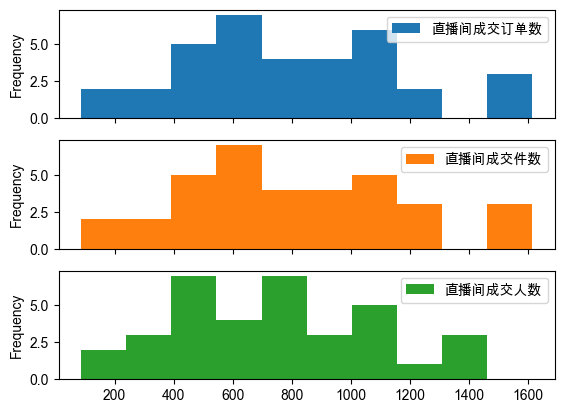

In [58]:
plt.rcParams['font.family'] = 'Arial Unicode MS'
df[['直播间成交订单数','直播间成交件数','直播间成交人数']].plot(kind="hist",subplots=True)


<Axes: >

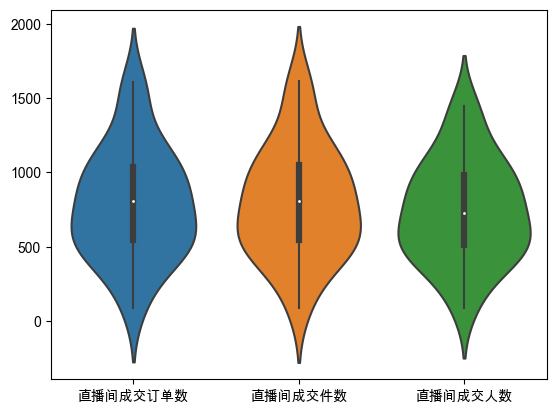

In [57]:
sns.violinplot(data=df[['直播间成交订单数','直播间成交件数','直播间成交人数']])

<Axes: >

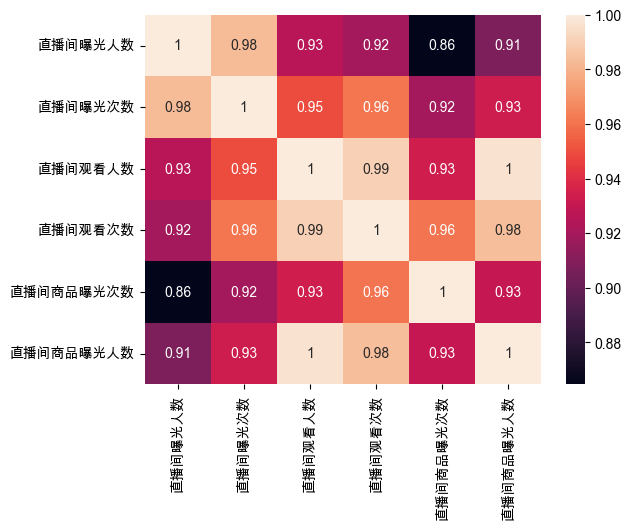

In [62]:
correlation = df[['直播间曝光人数','直播间曝光次数','直播间观看人数','直播间观看次数','直播间商品曝光次数','直播间商品曝光人数']].corr()
sns.heatmap(correlation, annot=True)

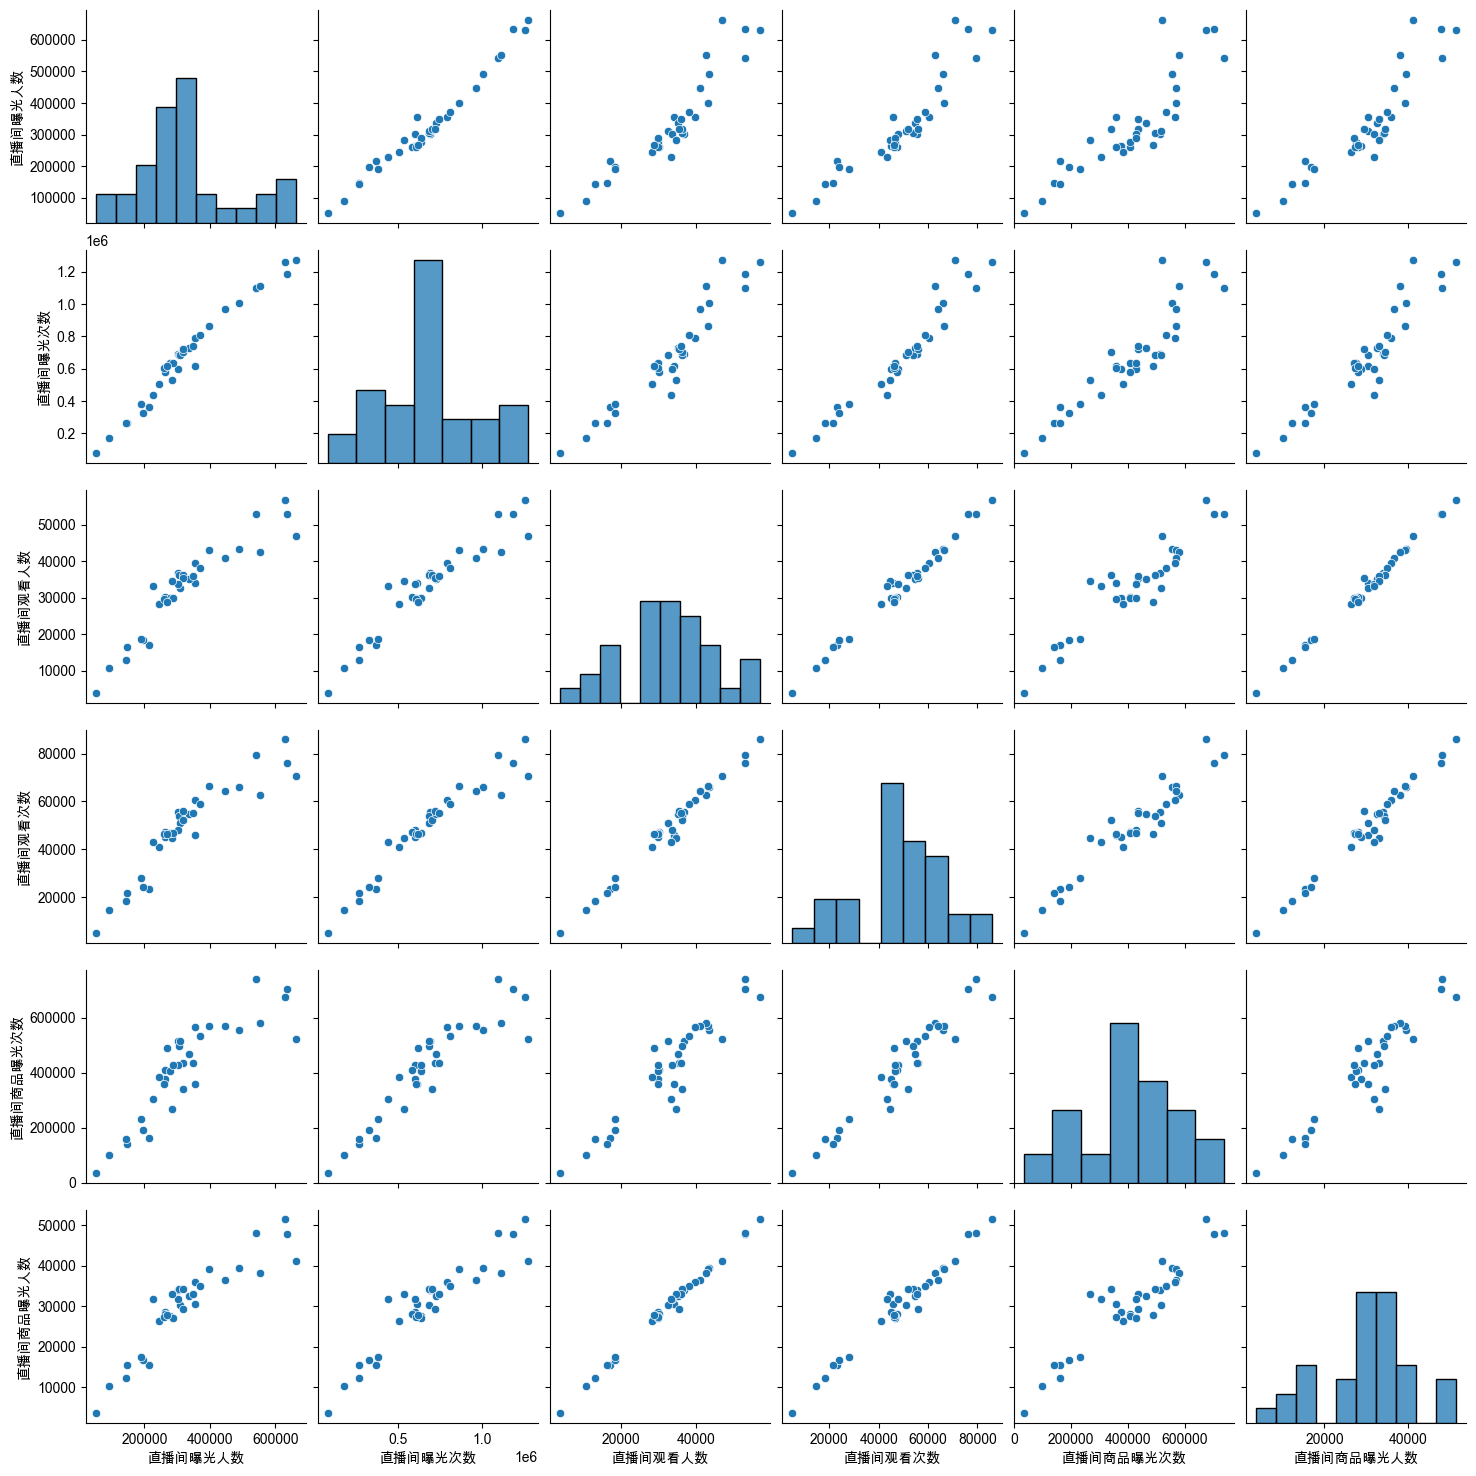

In [63]:
sns.pairplot(df[['直播间曝光人数','直播间曝光次数','直播间观看人数','直播间观看次数','直播间商品曝光次数','直播间商品曝光人数']])

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#score_array = df.values
score_feature = pca.fit_transform(df[['直播间曝光人数','直播间曝光次数','直播间观看人数','直播间观看次数','直播间商品曝光次数','直播间商品曝光人数']])
print("-----------PC-----------------")
pca_df = pd.DataFrame(score_feature)
pca_df.head()

-----------PC-----------------


,0,1
0,-711806.427848,60952.226219
1,-664467.106803,17359.356923
2,-573730.871070,-76098.047638
3,-398744.073039,38514.442819
4,-668238.349730,212930.692984


In [65]:
print("---------字段---------")
df.head()

---------字段---------


,直播开始时间,直播结束时间,直播间曝光人数,直播间曝光次数,直播间观看人数,直播间观看次数,评论次数,新加直播团人数,新增粉丝数,取关粉丝数,...,直播间商品点击人数,直播间商品曝光次数,直播间商品点击次数,直播间成交订单数,直播间成交金额,直播间成交件数,直播间成交人数,直播间退款订单数,直播间退款金额,直播间退款人数
0,2023/08/04 06:56:35,2023/08/04 23:15:46,630822,1260127,56838,85936,11114,167,1217,329,...,10537,674965,28319,1606,307032.49,1614,1451,337,59152.55,305
1,2023/08/02 06:57:36,2023/08/02 23:51:59,635096,1184680,52783,76198,10370,119,984,327,...,9729,703151,23908,1556,284419.33,1562,1414,328,56475.29,297
2,2023/08/05 06:59:17,2023/08/05 23:05:55,542010,1097373,52902,79600,10871,127,1012,300,...,11216,738659,28161,1474,260247.89,1491,1347,316,48869.37,293
3,2023/08/07 06:59:00,2023/08/07 23:02:29,490608,1007670,43413,65969,8433,32,547,305,...,9364,554218,22698,1266,201246.57,1282,1185,250,37003.85,236
4,2023/08/13 06:57:03,2023/08/13 23:00:44,663789,1275948,46731,70794,8722,23,614,304,...,9081,521491,22276,1171,186832.74,1182,1119,180,25731.05,172


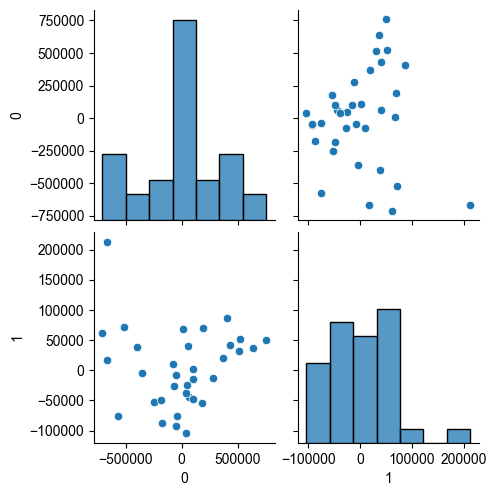

In [66]:
sns.pairplot(pca_df)